<a href="https://colab.research.google.com/github/dangelyjeanelle/Web_practice/blob/main/Project1_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SML 301: Project 1

#### General instructions

**This Project is due by 11:00pm EST on Sunday March 12.** Please submit **both a .pdf and a .ipynb** files on Gradescope by the deadline.

**Please do not email your work to any of the instructors in any case** (unless you have no access to Gradescope at the time when the assignment is due--in this case please email the head instructor both copies of your .pdf and .ipynb files before the deadline and upload the unaltered copies of the files to Gradescope as soon as you regain access to Gradescope).  We need your files to be on Gradescope in order to grade them.  Thus, even if you are late, please still submit the files on Gradescope.

This assignment should be completed individually.   You are welcome to get help (you can either ask questions on Ed Discussion or talk to the instructors during office hours) from the instructors; however, please do not post code/solutions on Ed Discussion on a public post.  


For all parts of this assignment, **all code *and outputs* should be visible on both the .pdf and .ipynb files**. Please **annotate your code**.


Late problem sets and projects (i.e., being late even after you use a late pass) will be penalized at intervals rounded up to multiples of 24 hours. For example, if you are 3 hours late, 10% off or if you are 30 hours late, 20% off.

----

Please type your name(s) after "Digitally signed:" below the honor pledge to serve as digital signature(s). 

> I pledge my honor that I have not violated the honor code when completing this assignment.

Digitally signed: Dangely Canabal

----

**When reporting numerical findings in the narrative part of your report, please round answers to an appropriate number of digits.  This usually means having 2 decimal places (e.g., 45.71); however, if the answer has a lot of leading zeros (e.g., 0.000034), you might want to include 2 or more non-zero digits. Just make sure that you do not report answers in long strings of numbers (e.g., 5.043289); this will make your report look unprofessional.**  **Remember not to round intermediate calculations.**  For example, if the dataset for the assignment was updated with additional rows, your code should still work without any modifications.  

## Instructions for this project

You must work independently on this project.  It is okay to discuss the general approach with your classmates but you are not permitted to show/share your code or answers to other people or to look at other people's code or answers.  You are welcome to use other resources in additional to the course materials. However, you are not permitted to look at any analyses or examples done on the dataset (or any datasets modified from this dataset) used in this project.

To prepare you for writing a good quality research paper, please structure your report in the format of a research paper.  Your report should have the following sections:

* Overview of the project (This is already provided to you.  You are welcome to add in more info, but it is fine to keep it the way it is.)
* Exploratory Data Analysis (I have provided some hints below.  The steps that you did in the Problem Set might also be helpful.)
* Methods
* Conclusion 
    + Result
    + Discussion

To make it convenient for the grader, please make all the code and output visible in your report.  

Some of the sections can be brief.  You will be graded on the quality, not the length, of your work.

## Overview

In this project we will build a Logistic model and a Random Forest (RF) model to predict whether a customer will default on a loan (i.e., to identify the loans in the "bad" category of the `good.bad` variable).  We will use the dataset `good_bad_loans.csv`.  This dataset has 1,303,286, rows and 18 columns.  Please see `variable definitions.pdf` for the definitions of the variables in the dataset.

## Exploratory Data Analysis

Please make sure that your EDA addresses the following:

* Do all the numbers make sense?  Do some sanity check on the data and address any potential problems with the data.

* How many observations does the dataset `good_bad_loans.csv` have?

* For each variable in the dataset what percentage of the data is missing?  In addition, if there is missing data in a variable, state what percent is missing for the `good` and `bad` categories. This should not take more than 4 lines of code. The argument `dropna` in the `value_counts()` function might be helpful.

* What is the ratio of the bad:good class sizes in the dataset?  Is the dataset balanced in terms of the numbers of good-bad accounts in the dataset?

* For the categorical variables, make plots to

    + compare class counts across different categories in each of the variables (see Precept 3)
    + compare class proportions across different categories in each of the variables (see Precept 5)

* For the numeric variables, make plots (see Precept 3) to compare the distribution of the variable between the two classes: bad and good.

* Name the top continuous variable and the top two categorical variables that have strong influence on the values of the `good_bad` variable.  




## Methods

* Use a balanced dataset for the analysis.  Since we do not know why some rows have missing values for `emp_length`, we are going to place all observations with missing values for `emp_length` under the same category called 'NA'.


* To reduce the number of predictors in the model.  Check the following.  For each of the variables, `emp_length`, `purpose` and `state`, calculate the percentage of the "bad" accounts in each of the categories of the variable.  Display the categories along with the percentages in an increasing order of the percentages.  For example for the variable `emp_length`, there are 12 categories (including the "NA" category), so there should be 12 percentages.  Plot these categories with the corresponding percentages in an increasing order. You should have already done this part in the EDA section.

*   Lump each set of the categories below into one new category.  Explain why this is a reasonable approach according to the results from the previous bullet point.  I suggest using the aggregations proposed below.  However, you are free to use whatever aggregation scheme you see fit; just make sure that you justify your approach--even if you are using the suggested scheme below, please still explain why you choose to do the aggregation this way.

    -  emp_length: maximum 1 year
    -  emp_length: 2-9 years
    -  purpose:  major purchase, vacation
    -  purpose:  educational, home_improvement
    -  purpose:  renewable_energy, moving
    -  purpose:  house, medical
    -  addr_state: ME, VT, IA, OR, NH
    -  addr_state: SC, KS, MT, WY, UT, CT
    -  addr_state: AK, MN, VA, DE, HI, MI
    -  addr_state: ND, PA, NC, KY, NJ, MD, SD, MO, NM, FL, TN, IN




## Building Two Models

We will first build a RF model and then the Logistic regression model with LASSO.

### The RF model

* I suggest building the RF model first.  This way you can see which variables have more predictive power to predict the target variable `good_bad`.   
Answer this in your report:  what are the top 5 and bottom 5 predictors (in terms of variable importance) according to your RF model results?  Please show the variable importance graph to support your answer.

* Report the confusion matrix and the estimated accuracy of the model that you choose.  Your estimated accuracy should be at least 64%.


### Logistic regression model with LASSO and cross-validation

Before building the Logistic regression model, we would like to reduce the number of predictors to reduce the computational time.  **Exclude the following variables in your model**:

* All the variables with important values that is less than 5% of the important value of the most important variable in your RF model.

*  There are two continuous X-variables that are highly correlated (i.e., the absolute value of the correlation is over 0.9).  Which ones are they?  (Hint: look up the variable definitions to make a guess and then verify your guess by looking up the correlation of the two variables that you selected.)  For the logistic regression model, please keep only one of these two variables--the more "*important*" one according to your RF result. 

* Report the area under the ROC curve for your champion model.  This should be at least 70%.
  
Please produce the ROC curve for your champion model.  Answer this with your ROC curve: According to your model, in order to identify 75% of the "bad" accounts, about what percentage of the "good" accounst do you have to misclassify?  

Estimate the AUC of your Logistic regression model if the model were used on a new set of data.  Report this number.

## Conceptual questions

Please answer the following questions in the Conclusion > Discussion section.

*  In one sentence explain why using a dataset that is severely imbalanced (in terms of the number of cases in the classes for the dependent variable) to build a model could result in poor performance of the model.  You can assume that we are not going to adjust the weights in the cost function.
*  What is the main difference between Bagging and RF?
*  In what situation will Logistic regression outperform RF?
*  True or False: If the variable `addr_state_WV` has a very low importance value (hypothetically), this means that the model thinks people living in the state West Virginia have low chance of having bad credit.  Explain. 



## Report quality 

Your report should be readable and reproducible. The maximum number of points for the report is 100.  20 points will be awarded for very readable and professional reports. For any claims that you make in the report it should be supported by numbers and/or plots.  10 points will be awarded for reports that are readable with reasonable effort. Points will be deducted for lack of reproducibility.  

A good report should 

* clearly discribe what you did, so other people could reproduce your result if they need to; you should also annotate your code. Also, you should use a seed whenever you are generating a random procedure.  Please set the seed to be 2023 in all situations.
* justify your steps by explain the theory supporting your approach.
* be written in a way that it demonstrates your strong understanding of the key concepts related to the topics covered in this project.





# Exploratory Data Analysis

* Do all the numbers make sense?  Do some sanity check on the data and address any potential problems with the data.

* How many observations does the dataset `good_bad_loans.csv` have?



In [ ]:
# Read and examine data
import pandas as pd
df = pd.read_csv('good_bad_loans.csv')
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)

   funded_amnt       term  int_rate  installment grade emp_length  \
0        30000  36 months     22.35      1151.16     D    5 years   
1        40000  60 months     16.14       975.71     C   < 1 year   
2        20000  36 months      7.56       622.68     A  10+ years   
3         4500  36 months     11.31       147.99     B  10+ years   
4         8425  36 months     27.27       345.18     E    3 years   

  home_ownership  annual_inc             purpose addr_state    dti  \
0       MORTGAGE    100000.0  debt_consolidation         CA  30.46   
1       MORTGAGE     45000.0         credit_card         OH  50.53   
2       MORTGAGE    100000.0         credit_card         WA  18.92   
3           RENT     38500.0         credit_card         TX   4.64   
4       MORTGAGE    450000.0         credit_card         MA  12.37   

   delinq_2yrs  inq_last_6mths application_type  acc_now_delinq  delinq_amnt  \
0            0               0        Joint App               0            0   
1   

* For each variable in the dataset what percentage of the data is missing?  In addition, if there is missing data in a variable, state what percent is missing for the `good` and `bad` categories. This should not take more than 4 lines of code. The argument `dropna` in the `value_counts()` function might be helpful.


In [ ]:

print(df.isna().any())
df.isna().mean() * 100

funded_amnt         False
term                False
int_rate            False
installment         False
grade               False
emp_length           True
home_ownership      False
annual_inc          False
purpose             False
addr_state          False
dti                 False
delinq_2yrs         False
inq_last_6mths      False
application_type    False
acc_now_delinq      False
delinq_amnt         False
tax_liens           False
good_bad            False
dtype: bool


funded_amnt         0.000000
term                0.000000
int_rate            0.000000
installment         0.000000
grade               0.000000
emp_length          5.766885
home_ownership      0.000000
annual_inc          0.000000
purpose             0.000000
addr_state          0.000000
dti                 0.000000
delinq_2yrs         0.000000
inq_last_6mths      0.000000
application_type    0.000000
acc_now_delinq      0.000000
delinq_amnt         0.000000
tax_liens           0.000000
good_bad            0.000000
dtype: float64


* What is the ratio of the bad:good class sizes in the dataset?  Is the dataset balanced in terms of the numbers of good-bad accounts in the dataset?




In [ ]:
print(df['good_bad'].value_counts())

good = df['good_bad'].value_counts()[0]
bad = df['good_bad'].value_counts()[1]
print(bad/good)

good    1041663
bad      261623
Name: good_bad, dtype: int64
0.25115896407955357


This dataset is not balanced, evidently




* For the categorical variables, make plots to

    + compare class counts across different categories in each of the variables (see Precept 3)
    + compare class proportions across different categories in each of the variables (see Precept 5)




Index(['term', 'grade', 'emp_length', 'home_ownership', 'purpose',
       'addr_state', 'application_type'],
      dtype='object')


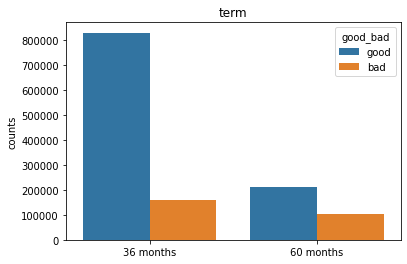

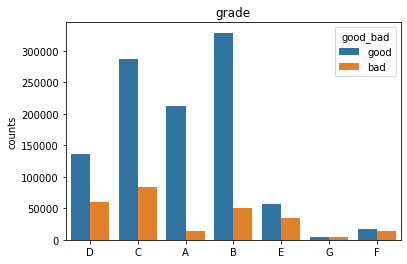

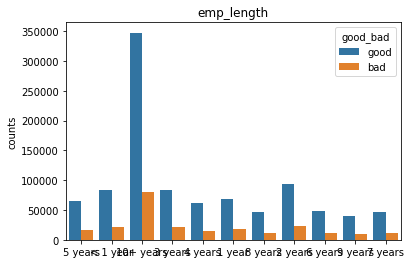

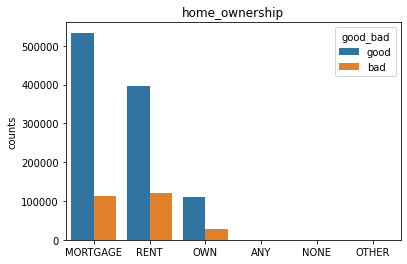

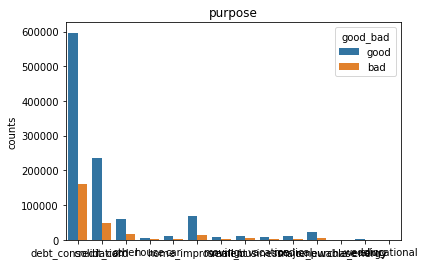

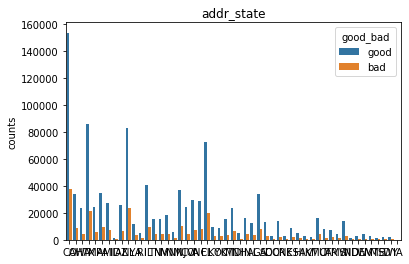

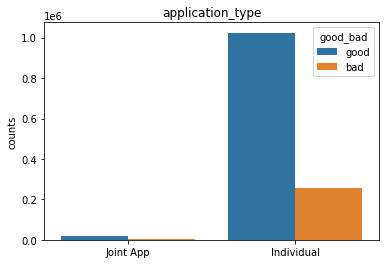

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
names=df.select_dtypes(exclude='number').drop('good_bad', axis=1).columns
print(names)

for i in names:
    g = sns.countplot(data = df, x = i, hue="good_bad") 
    g.set(title = str(i),
         ylabel = 'counts',
         xlabel = '')
    plt.show()

['term', 'good_bad']


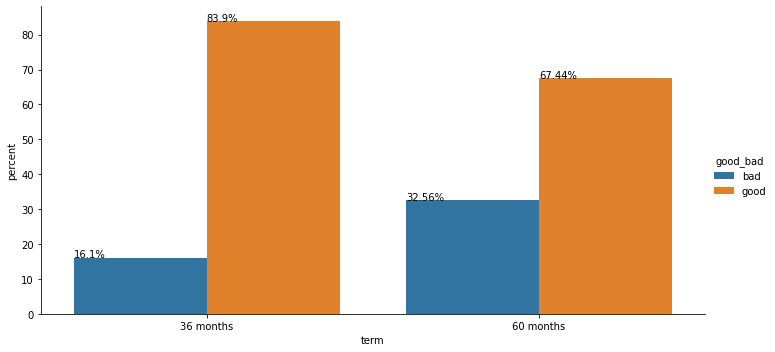

['grade', 'good_bad']


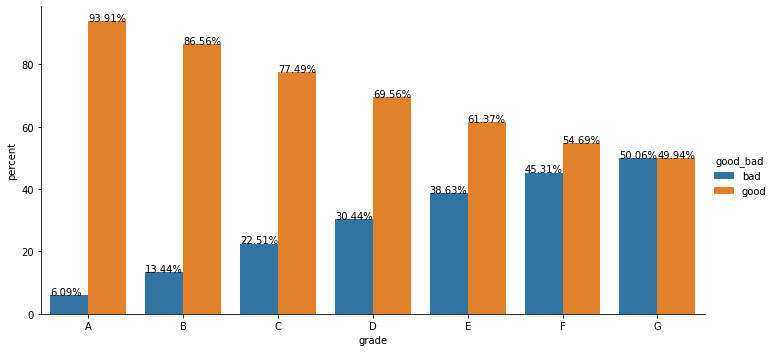

['emp_length', 'good_bad']


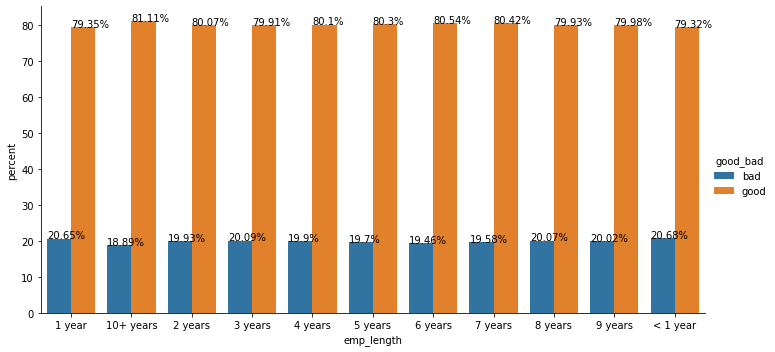

['home_ownership', 'good_bad']


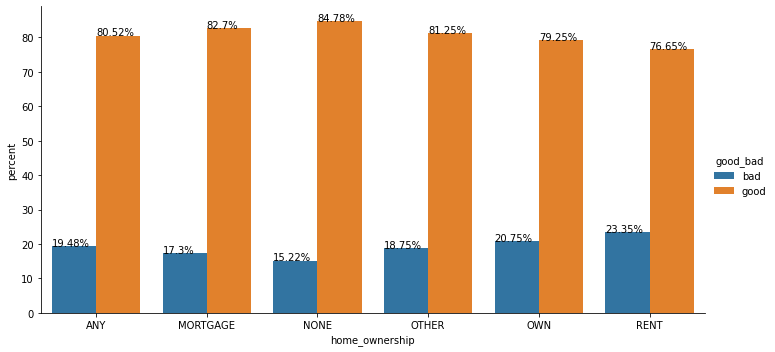

['purpose', 'good_bad']


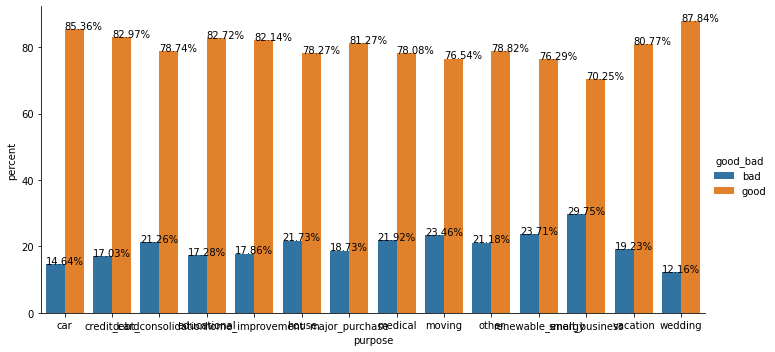

['addr_state', 'good_bad']


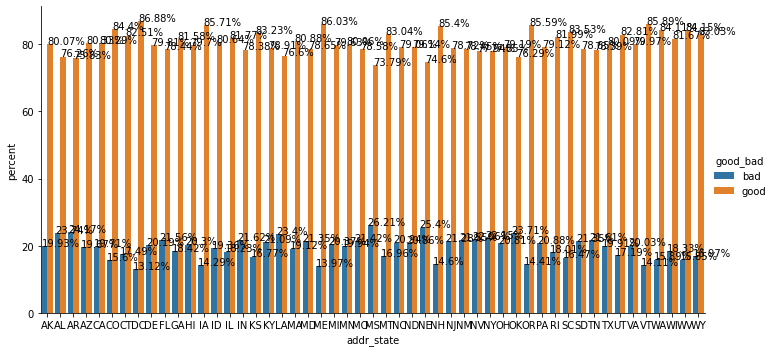

['application_type', 'good_bad']


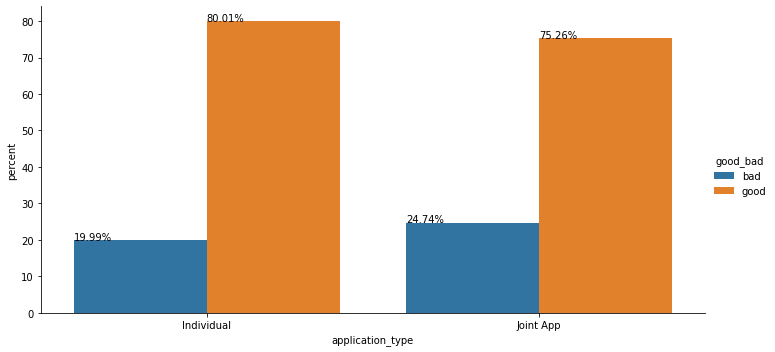

In [ ]:
for i in names:
  prop = df.groupby(i)['good_bad'].value_counts(normalize = True)
  perct = prop*100
  print(perct.index.names)
  perct_df = perct.reset_index(name = 'percent')
  perct_df1 = perct_df.sort_values([i, 'good_bad'])

  g = sns.catplot(x=i,y='percent',hue='good_bad',kind='bar',
                  data=perct_df1, height=5, aspect=2)
  g
  for p in g.ax.patches:
      txt = str(p.get_height().round(2)) + '%'
      txt_x = p.get_x() 
      txt_y = p.get_height()
      g.ax.text(txt_x,txt_y,txt)
  plt.show() 



* For the numeric variables, make plots (see Precept 3) to compare the distribution of the variable between the two classes: bad and good.


In [ ]:
# Create numerical target
df['gb']=df['good_bad'].replace(['good', 'bad'],
                             [1, 0], inplace=False)
onlyNum = df.select_dtypes(include='number')

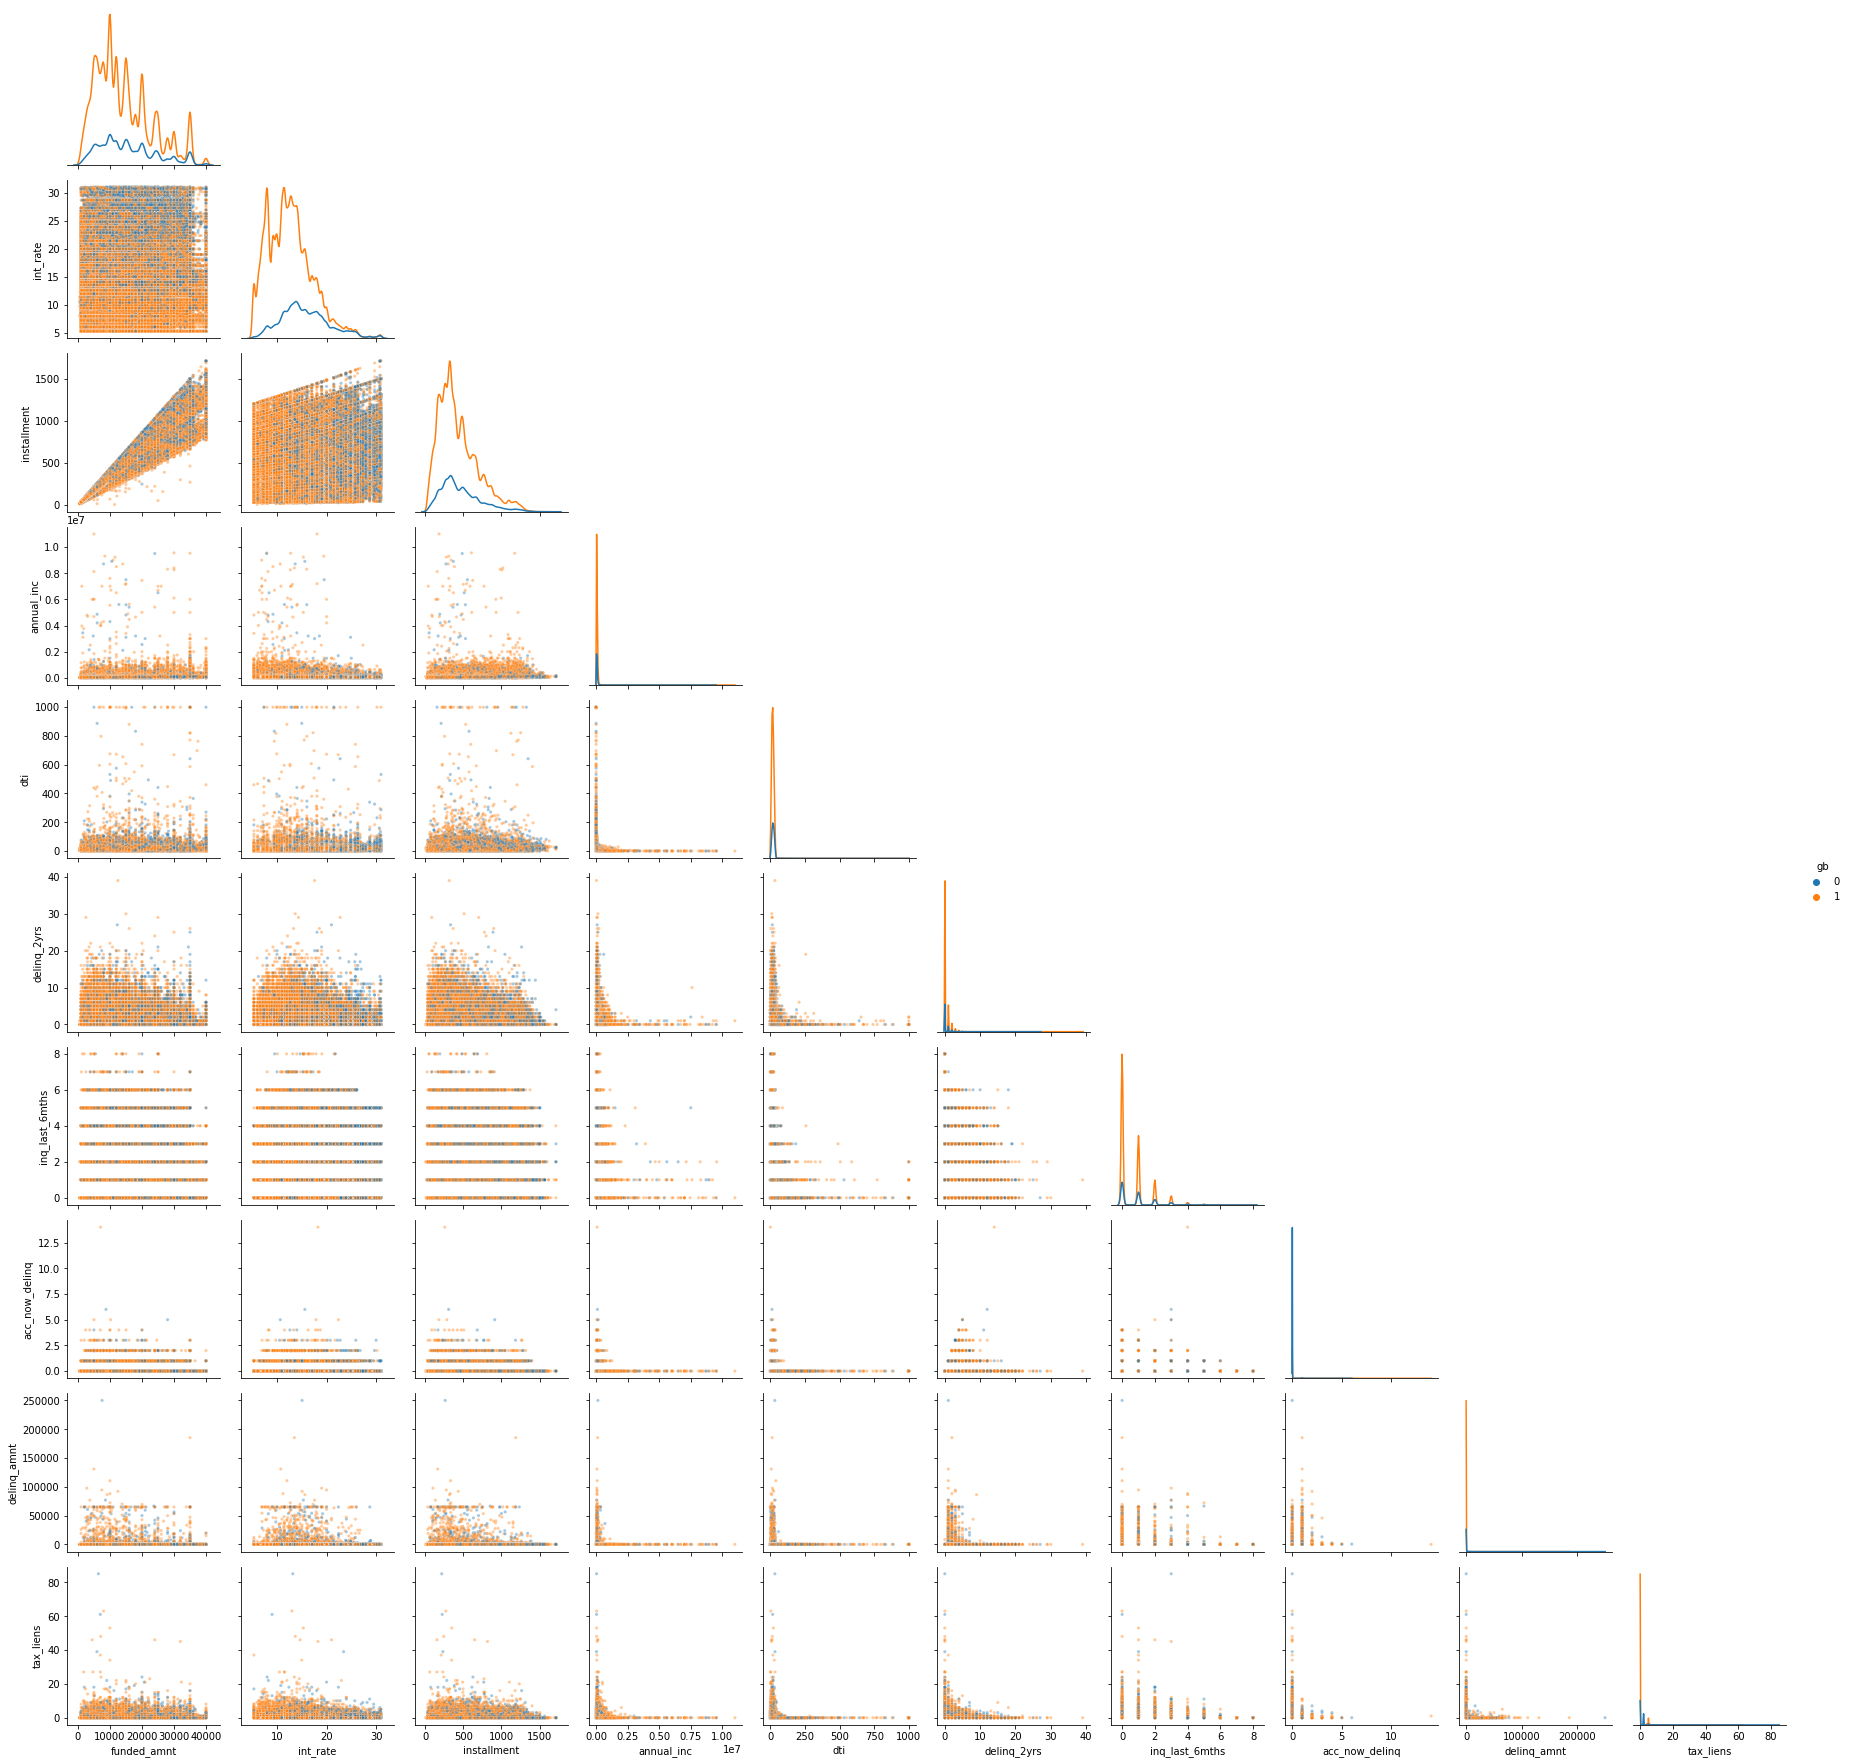

In [ ]:
g = sns.PairGrid(onlyNum, hue = 'gb', diag_sharey = False, corner = True)
g.map_diag(sns.kdeplot)
g.map_lower(sns.scatterplot, s = 10, alpha = .4)
g.add_legend()


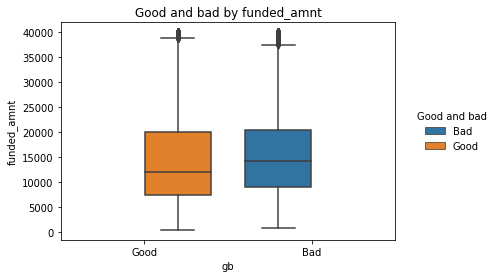

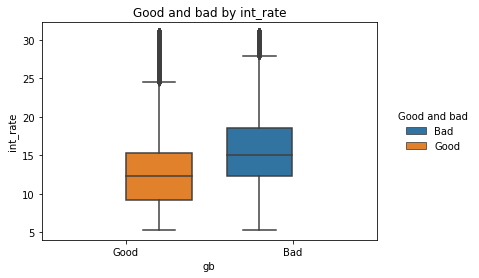

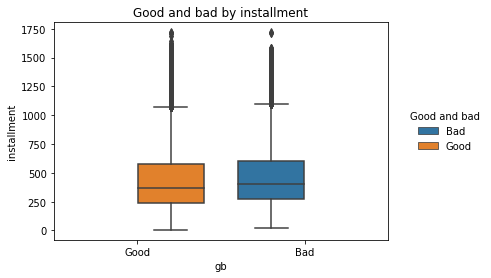

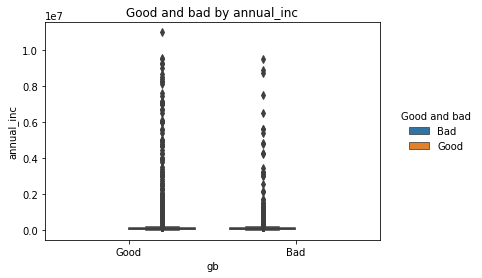

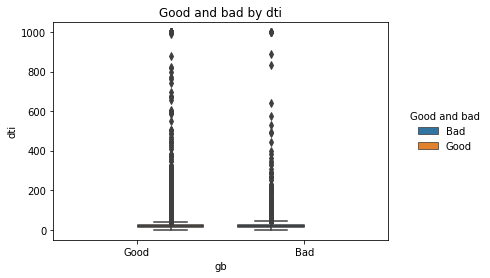

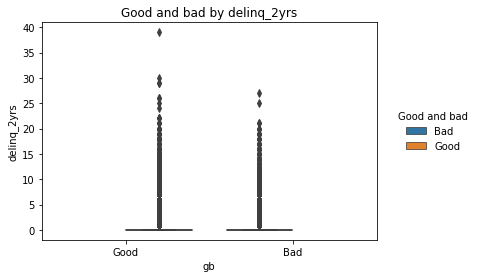

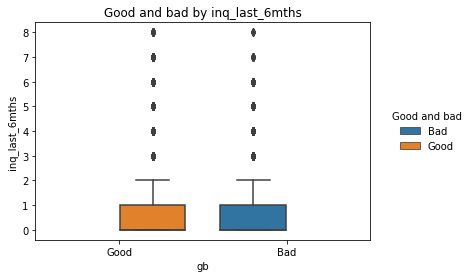

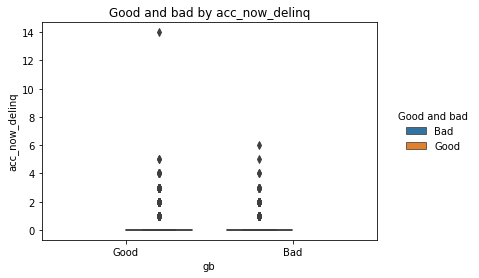

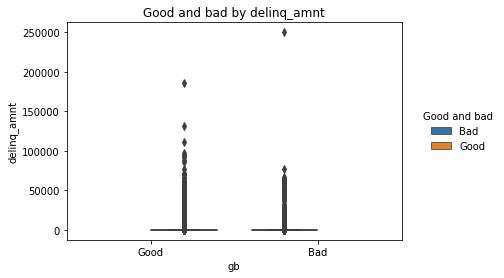

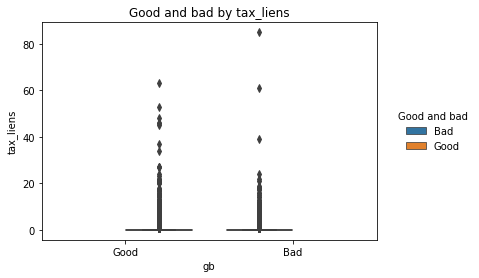

In [ ]:
for col in onlyNum.columns[:-1]: # we plot the boxes for all the numeric variable, except for the target
#    plt.figure()
    g = sns.boxplot(data=df, y = col, x = df['gb'].replace([0, 1],
                             ['Bad', 'Good']), hue = 'gb')
    # add title
    g.set(title = "Good and bad by " + col,
    ylabel = col#,
#    xlabel = 'Shelf location categories'
         )
    plt.legend(title='Good and bad',  loc='center right', 
           labels=['Bad', 'Good'], 
          framealpha=0, bbox_to_anchor=(1.3, 0.5)) 
    plt.show() # display the figure


* Name the top continuous variable and the top two categorical variables that have strong influence on the values of the `good_bad` variable.  

The top continuous variable would be int_rate and the top two categorical variables would be grade and term

# Methods


* Use a balanced dataset for the analysis.  Since we do not know why some rows have missing values for `emp_length`, we are going to place all observations with missing values for `emp_length` under the same category called 'NA'.

In [ ]:
import numpy as np
print(df['emp_length'].value_counts(dropna=False))
df['emp_length']=df['emp_length'].fillna('NA')
print(df['emp_length'].value_counts(dropna=False))

print(df[df['emp_length']=='NA']['good_bad'].value_counts(dropna=False))

10+ years    428547
2 years      117821
< 1 year     104529
3 years      104201
1 year        85671
5 years       81622
4 years       78029
NA            75159
6 years       60933
8 years       59125
7 years       58146
9 years       49503
Name: emp_length, dtype: int64
10+ years    428547
2 years      117821
< 1 year     104529
3 years      104201
1 year        85671
5 years       81622
4 years       78029
NA            75159
6 years       60933
8 years       59125
7 years       58146
9 years       49503
Name: emp_length, dtype: int64
good    54822
bad     20337
Name: good_bad, dtype: int64


* To reduce the number of predictors in the model.  Check the following.  For each of the variables, `emp_length`, `purpose` and `state`, calculate the percentage of the "bad" accounts in each of the categories of the variable.  Display the categories along with the percentages in an increasing order of the percentages.  For example for the variable `emp_length`, there are 12 categories (including the "NA" category), so there should be 12 percentages.  Plot these categories with the corresponding percentages in an increasing order. You should have already done this part in the EDA section.



['emp_length', 'good_bad']


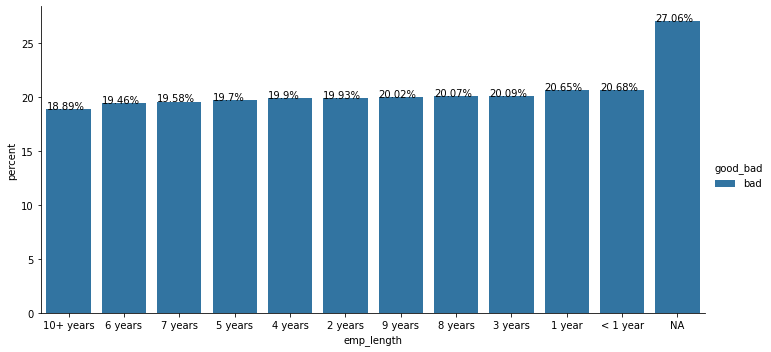

['purpose', 'good_bad']


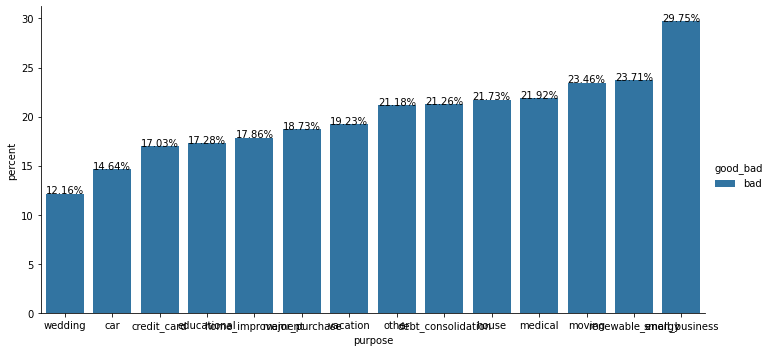

['addr_state', 'good_bad']


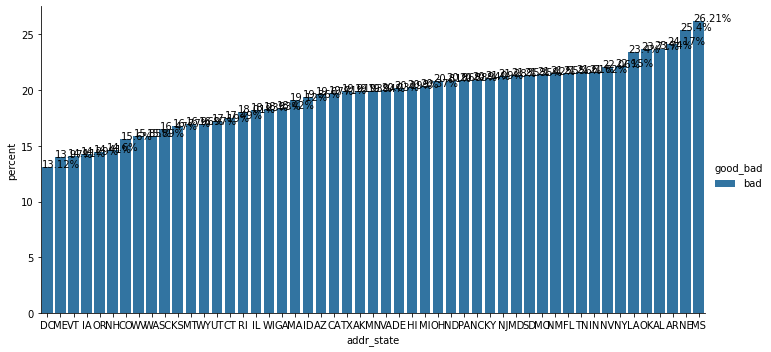

In [ ]:
vars = ['emp_length', 'purpose', 'addr_state']
for i in vars:
  prop = df.groupby(i)['good_bad'].value_counts(normalize = True)
  perct = prop*100
  print(perct.index.names)
  perct_df = perct.reset_index(name = 'percent')
  perct_df1 = perct_df.sort_values([i, 'good_bad'])

  perct_df1_bad = perct_df1[perct_df1['good_bad']=='bad']

  plot_order = perct_df1_bad.sort_values(by='percent', ascending=True)

  g = sns.catplot(x=i,y='percent',hue='good_bad',kind='bar',
                  data=plot_order, height=5, aspect=2)
  g
  for p in g.ax.patches:
      txt = str(p.get_height().round(2)) + '%'
      txt_x = p.get_x() 
      txt_y = p.get_height()
      g.ax.text(txt_x,txt_y,txt)
  plt.show() 



*   Lump each set of the categories below into one new category.  Explain why this is a reasonable approach according to the results from the previous bullet point.  I suggest using the aggregations proposed below.  However, you are free to use whatever aggregation scheme you see fit; just make sure that you justify your approach--even if you are using the suggested scheme below, please still explain why you choose to do the aggregation this way.

    -  emp_length: maximum 1 year
    -  emp_length: 2-9 years
    -  purpose:  major purchase, vacation
    -  purpose:  educational, home_improvement
    -  purpose:  renewable_energy, moving
    -  purpose:  house, medical
    -  addr_state: ME, VT, IA, OR, NH
    -  addr_state: SC, KS, MT, WY, UT, CT
    -  addr_state: AK, MN, VA, DE, HI, MI
    -  addr_state: ND, PA, NC, KY, NJ, MD, SD, MO, NM, FL, TN, IN



I chose to use the lumps above because they had extremely close percentages, which means the variables and dummies for the model get simplified without getting rid of data

In [ ]:

emp_length_1 = ['< 1 year', '1 year']
emp_length_2 = ['2 years', '3 years', '4 years','5 years', '6 years','7 years', '8 years', '9 years']
purpose_1 = ['major_purchase', 'vacation']
purpose_2 = ['educational', 'home_improvement']
purpose_3 = ['renewable_energy', 'moving']
purpose_4 = ['house', 'medical']
addr_state_1 = ['ME', 'VT', 'IA', 'OR', 'NH']
addr_state_2 = ['SC', 'KS', 'MT', 'WY', 'UT', 'CT']
addr_state_3 = ['AK', 'MN', 'VA', 'DE', 'HI', 'MI']
addr_state_4 = ['ND', 'PA', 'NC', 'KY', 'NJ', 'MD', 'SD', 'MO', 'NM', 'FL', 'TN', 'IN']

df['emp_length'] = (df.emp_length.
                          apply(lambda x: x 
                                if x not in emp_length_1
                                else "grp1"))
df['emp_length'] = (df.emp_length.
                          apply(lambda x: x 
                                if x not in emp_length_2
                                else "grp2"))
df['purpose'] = (df.purpose.
                          apply(lambda x: x 
                                if x not in purpose_1
                                else "grp1"))
df['purpose'] = (df.purpose.
                          apply(lambda x: x 
                                if x not in purpose_2
                                else "grp2"))
df['purpose'] = (df.purpose.
                          apply(lambda x: x 
                                if x not in purpose_3
                                else "grp3"))
df['purpose'] = (df.purpose.
                          apply(lambda x: x 
                                if x not in purpose_4
                                else "grp4"))
df['addr_state'] = (df.addr_state.
                          apply(lambda x: x 
                                if x not in addr_state_1
                                else "grp1"))
df['addr_state'] = (df.addr_state.
                          apply(lambda x: x 
                                if x not in addr_state_2
                                else "grp2"))
df['addr_state'] = (df.addr_state.
                          apply(lambda x: x 
                                if x not in addr_state_3
                                else "grp3"))
df['addr_state'] = (df.addr_state.
                          apply(lambda x: x 
                                if x not in addr_state_4
                                else "grp4"))


['emp_length', 'good_bad']


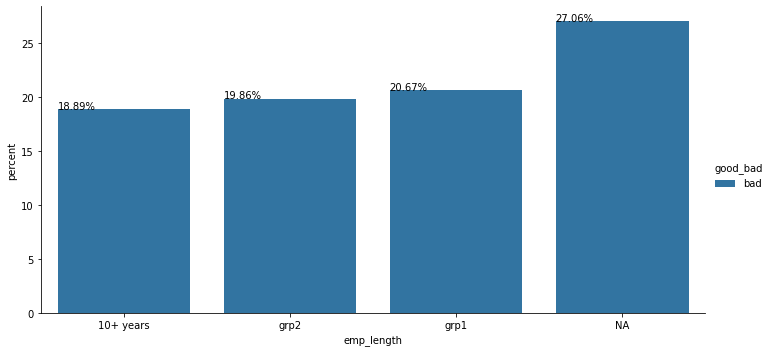

['purpose', 'good_bad']


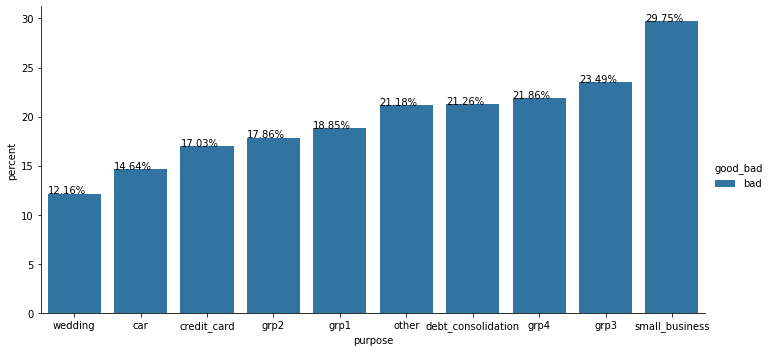

['addr_state', 'good_bad']


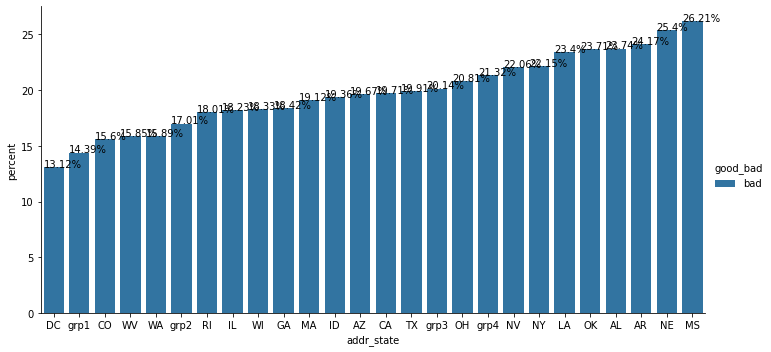

In [ ]:
vars = ['emp_length', 'purpose', 'addr_state']
for i in vars:
  prop = df.groupby(i)['good_bad'].value_counts(normalize = True)
  perct = prop*100
  print(perct.index.names)
  perct_df = perct.reset_index(name = 'percent')
  perct_df1 = perct_df.sort_values([i, 'good_bad'])

  perct_df1_bad = perct_df1[perct_df1['good_bad']=='bad']

  plot_order = perct_df1_bad.sort_values(by='percent', ascending=True)

  g = sns.catplot(x=i,y='percent',hue='good_bad',kind='bar',
                  data=plot_order, height=5, aspect=2)
  g
  for p in g.ax.patches:
      txt = str(p.get_height().round(2)) + '%'
      txt_x = p.get_x() 
      txt_y = p.get_height()
      g.ax.text(txt_x,txt_y,txt)
  plt.show() 

# Building Two Models

We will first build a RF model and then the Logistic regression model with LASSO.



In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV


## The RF model

* I suggest building the RF model first.  This way you can see which variables have more predictive power to predict the target variable `good_bad`.   
Answer this in your report:  what are the top 5 and bottom 5 predictors (in terms of variable importance) according to your RF model results?  Please show the variable importance graph to support your answer.


In [ ]:
# create dummies for categories in categorical variables
dummies = pd.get_dummies(df.select_dtypes(include=object).drop(['good_bad'], axis=1))
print(dummies.head())
dummies.info() # no missing values

   term_36 months  term_60 months  grade_A  grade_B  grade_C  grade_D  \
0               1               0        0        0        0        1   
1               0               1        0        0        1        0   
2               1               0        1        0        0        0   
3               1               0        0        1        0        0   
4               1               0        0        0        0        0   

   grade_E  grade_F  grade_G  emp_length_10+ years  ...  addr_state_TX  \
0        0        0        0                     0  ...              0   
1        0        0        0                     0  ...              0   
2        0        0        0                     1  ...              0   
3        0        0        0                     1  ...              1   
4        1        0        0                     0  ...              0   

   addr_state_WA  addr_state_WI  addr_state_WV  addr_state_grp1  \
0              0              0              0   

In [ ]:
# create the continuous numeric part of the X
X_numeric = df.select_dtypes(include='number').drop(['gb'], axis = 1)
X_numeric.head()

,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,acc_now_delinq,delinq_amnt,tax_liens
0,30000,22.35,1151.16,100000.0,30.46,0,0,0,0,0
1,40000,16.14,975.71,45000.0,50.53,0,0,0,0,0
2,20000,7.56,622.68,100000.0,18.92,0,0,0,0,0
3,4500,11.31,147.99,38500.0,4.64,0,0,0,0,0
4,8425,27.27,345.18,450000.0,12.37,0,0,0,0,0


In [ ]:
# Create all features
X = pd.concat([X_numeric, 
              dummies], axis = 1)

X.head()

,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,acc_now_delinq,delinq_amnt,tax_liens,...,addr_state_TX,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_grp1,addr_state_grp2,addr_state_grp3,addr_state_grp4,application_type_Individual,application_type_Joint App
0,30000,22.35,1151.16,100000.0,30.46,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,40000,16.14,975.71,45000.0,50.53,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,20000,7.56,622.68,100000.0,18.92,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,4500,11.31,147.99,38500.0,4.64,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,8425,27.27,345.18,450000.0,12.37,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Creat target
y = df['gb']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: gb, dtype: int64

In [ ]:
# split data into nontest and test set for finding best fit
X_nontest, X_test, y_nontest, y_test = train_test_split(X, y, 
                                                        test_size=0.99, 
                                                        random_state=2023,
                                                        stratify = y) # make sure that all sets have 
                                                        # similar proportion of Y-classes

In [ ]:
print(X_nontest)

         funded_amnt  int_rate  installment  annual_inc    dti  delinq_2yrs  \
850948         11200     15.61       391.61    45000.00  22.99            0   
25439           2500      9.43        80.01    89000.00  17.49            0   
1269600         7000     14.74       241.76    35482.20  17.28            0   
359150         29000      7.26       898.89    93000.00  20.40            1   
513391         11000      9.99       354.89    65000.00  26.58            0   
...              ...       ...          ...         ...    ...          ...   
945859         25475     14.33       874.77    70000.00  27.86            0   
170625         30000     18.99       778.06   132261.51  19.78            0   
827332         24925     16.99       619.32    56000.00  22.86            1   
659892         35000     15.59      1223.43    95000.00  14.73            0   
207646         20000     10.75       652.41    69000.00  18.75            0   

         inq_last_6mths  acc_now_delinq  delinq_amn

In [ ]:
# ## Define a dictionary of hyperparameters to search over
hyperparameters = {'n_estimators':[x for x in range(100, 701, 200)], # The number of trees in the forest.
                   'min_samples_split': [x for x in range(5, 46, 10)], # The minimum number of samples required to 
                   'n_jobs' : [-1],             # Number of jobs to run in parallel. -1 means using all processors. 
                   'random_state' : [2023],
                   'max_features': [x for x in range(1, 30, 4)], # The number of features to consider when 
                                                                  # looking for the best split
                   'oob_score' : [True] #use out-of-bag samples to estimate the generalization score
                  }

# # Note that all values to the right of the colon need to be lists, so use `[]` even for single values
# # see https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html



In [ ]:

# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Initialize a random forest classifier
rf = RandomForestClassifier()

# Perform randomized search cross-validation to find the best hyperparameters
randomized_search = RandomizedSearchCV(estimator=rf,
                                       param_distributions=hyperparameters,
                                       n_iter=10, # Number of parameter settings that are sampled
                                       cv=5, # folds of the cross-validations
                                       n_jobs = -1,
                                       random_state=2023)
randomized_search.fit(X_nontest, y_nontest)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_features': [1, 5, 9, 13, 17, 21,
                                                         25, 29],
                                        'min_samples_split': [5, 15, 25, 35,
                                                              45],
                                        'n_estimators': [100, 300, 500, 700],
                                        'n_jobs': [-1], 'oob_score': [True],
                                        'random_state': [2023]},
                   random_state=2023)

In [ ]:
# Get the best hyperparameters and fit the model with them
best_hyperparameters = randomized_search.best_params_
best_rf = RandomForestClassifier(**best_hyperparameters)
# see what the ** means here:
# https://stackoverflow.com/questions/8028192/what-does-mean-in-python

In [ ]:
best_hyperparameters

{'random_state': 2023,
 'oob_score': True,
 'n_jobs': -1,
 'n_estimators': 500,
 'min_samples_split': 35,
 'max_features': 13}

In [ ]:
best_rf

RandomForestClassifier(max_features=13, min_samples_split=35, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=2023)

In [ ]:
# split data into nontest and test set for training the best rf model
X_nontest, X_test, y_nontest, y_test = train_test_split(X, y, 
                                                        test_size=0.2, 
                                                        random_state=2023,
                                                        stratify = y) # make sure that all sets have 
                                                        # similar proportion of Y-classes

In [ ]:
best_rf.fit(X_nontest, y_nontest)

In [ ]:
# Predict on the test set and calculate accuracy
y_pred = best_rf.predict(X_test)
y_pred

In [ ]:

from sklearn import metrics # for computing accuracy, AUC-ROC score, accuracy_score
accuracy = metrics.accuracy_score(y_test, y_pred)

# the "f" below means "format a string"
# for more details see https://stackoverflow.com/questions/57150426/what-is-printf
print(f"Best hyperparameters: {best_hyperparameters}")
print(f"Accuracy: {accuracy}")

In [ ]:
importances = best_rf.feature_importances_
importances

In [ ]:
# # Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_indices

In [ ]:
# Create a bar plot of feature importances
# Create a bar plot of feature importances:
plt.bar(range(X.shape[1]), [importances[i] for i in sorted_indices])
plt.xticks(range(X.shape[1]), 
           [X.columns[i] for i in sorted_indices], 
           rotation=90)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [ ]:
top_5 = [X.columns[i] for i in sorted_indices[0:5]]
top_5

In [ ]:
bottom_5 = [X.columns[i] for i in sorted_indices[-5:]]
bottom_5



* Report the confusion matrix and the estimated accuracy of the model that you choose.  Your estimated accuracy should be at least 64%.


In [ ]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred) 
#extracting TN, FP, FN, TP
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print(cm)
print('Model Accuracy = "{}!"'.format((TP + TN) / (TP + TN + FN + FP)))


## Logistic regression model with LASSO and cross-validation

Before building the Logistic regression model, we would like to reduce the number of predictors to reduce the computational time.  **Exclude the following variables in your model**:

* All the variables with important values that is less than 5% of the important value of the most important variable in your RF model.

*  There are two continuous X-variables that are highly correlated (i.e., the absolute value of the correlation is over 0.9).  Which ones are they?  (Hint: look up the variable definitions to make a guess and then verify your guess by looking up the correlation of the two variables that you selected.)  For the logistic regression model, please keep only one of these two variables--the more "*important*" one according to your RF result. 

* Report the area under the ROC curve for your champion model.  This should be at least 70%.
  
Please produce the ROC curve for your champion model.  Answer this with your ROC curve: According to your model, in order to identify 75% of the "bad" accounts, about what percentage of the "good" accounst do you have to misclassify?  

Estimate the AUC of your Logistic regression model if the model were used on a new set of data.  Report this number.







In [ ]:
most_important = importances[sorted_indices[0]]
most_important

In [ ]:
to_be_dropped = []
for i in sorted_indices:
  importance = importances[i]
  if importance < 0.05*most_important:
    to_be_dropped.append(X.columns[i])


In [ ]:
onlyNum['installment'].corr(onlyNum['funded_amnt'])

According to the RF, installment is more important than funded_amount

In [ ]:
to_be_dropped.append('funded_amnt')
print(to_be_dropped)

In [ ]:
new_X = X.select_dtypes(exclude='datetime').drop(to_be_dropped, axis=1)
new_X.head()

In [ ]:
list_numerical = (new_X.select_dtypes(include='number')).columns
list_numerical

In [ ]:
from sklearn.preprocessing import StandardScaler

X_nontest, X_test, y_nontest, y_test = train_test_split(new_X, y, test_size=0.3, random_state=2023)

scaler = StandardScaler().fit(X_nontest[list_numerical]) 

# transform nontest and test sets with the parameters
X_nontest[list_numerical] = scaler.transform(X_nontest[list_numerical])

X_test[list_numerical] = scaler.transform(X_test[list_numerical])

X_nontest.head()

In [ ]:
from sklearn.linear_model import LogisticRegression

lambdas = np.logspace(-0.5, 0.1, num=20)
# specify range of hyperparameters
params = {"C":1/lambdas, "penalty":["l1"]}# l1 lasso

cv = StratifiedKFold(n_splits=10, # number of splits
                     random_state=2023, # set seed for the randomization
                     shuffle=True)

## using Logistic regression for class imbalance
model = LogisticRegression(class_weight='balanced', solver='saga', penalty="l1", max_iter=2000)

grid_search_cv = GridSearchCV(estimator = model, 
                              param_grid = params, 
                              scoring= 'roc_auc', 
                              cv = cv, 
                              return_train_score=True, verbose = 1)    
# We chose to fit on the nontest sets for X and y since we are doing cross-validation 
best_model = grid_search_cv.fit(X_nontest, y_nontest)
                                      
cv_results = pd.DataFrame(grid_search_cv.cv_results_)
cv_results.head()

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel("lambda")
plt.ylabel("AUC")
plt.plot(1/cv_results['param_C'],cv_results['mean_test_score'])
plt.show()

In [ ]:
print('AUC of champion model:', cv_results['mean_test_score'].max())

In [ ]:
# X_nontest, X_test, y_nontest, y_test = train_test_split(new_X, y, test_size=0.2, random_state=2023)
# scaler = StandardScaler().fit(X_nontest[list_numerical]) 

# # transform nontest and test sets with the parameters
# X_nontest[list_numerical] = scaler.transform(X_nontest[list_numerical])

# X_test[list_numerical] = scaler.transform(X_test[list_numerical])

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
print('Accuracy: ', (y_pred==list(y_test)).mean()) # accuracy of the champion model

# the coef estimates are stored in
print("Best estimator coef", best_model.best_estimator_.coef_)

# we can print out the coef. estimates with the corresponding names
print(1/best_model.best_estimator_.C)
print("Intercept = ", best_model.best_estimator_.intercept_)
for i in range(0 , X_nontest.shape[1]):
    print(X_nontest.columns[i], '=', best_model.best_estimator_.coef_[0, i])
    


In [ ]:
y_pred_proba = best_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

# Calculate AUC
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('Estimated AUC for new data', auc)

# Create ROC curve
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show

According to the ROC Curve, in order to correctly classify 75% of the bad accounts, we would have to misclassify about 40% of the good ones




# Conclussion









##Discussion

*  In one sentence explain why using a dataset that is severely imbalanced (in terms of the number of cases in the classes for the dependent variable) to build a model could result in poor performance of the model.  You can assume that we are not going to adjust the weights in the cost function.


Using a severely imbalanced datase to build a model can cause challenges because the model might be tempted to try to always predict the majority class. If we have a dataset with and 80-20 split in classes, the model always outputting the majority class would result in 80% accuracy which might seem acceptable at first glance, but would not be a good model to predict with.

*  What is the main difference between Bagging and RF?



In bagging, all features are considered for splitting a node, while in RF only some features are chosen to determine the splitting of nodes.


*  In what situation will Logistic regression outperform RF?


It should perform better when the number of noise variables is less than or equal to explanatory variables. As noise variables grow, the performance of RF will beat that of Logistic Regression.


*  True or False: If the variable `addr_state_WV` has a very low importance value (hypothetically), this means that the model thinks people living in the state West Virginia have low chance of having bad credit.  Explain. 


False. What this actually means is the model thinks the fact that people live in West Virginia has very little to no effect on whether or not they have bad accounts.